
## 🎯 **Aufgabenstellung**

In dieser Aufgabe soll ein **Klassifikationsmodell** erstellt werden zur **Vorhersage von defekten Flaschen** anhand der **Drop Vibration Daten**.

Diese Daten repräsentieren eine **Zeitreihe der Vibrationen von Flaschen bei der Vereinzelung** und werden genutzt, um defekte von intakten Flaschen zu unterscheiden.

---

## 🔧 **Anforderungen**

- **Trainiere ein Klassifikationsmodell**, das defekte Flaschen vorhersagt.
- Erstelle eine **Confusion Matrix**, um die Ergebnisse deiner Klassifikation zu dokumentieren.
- Dokumentiere die **genutzten Spalten (Features)** für die Vorhersage und deren **F1-Score** in einer Tabelle.

---

## 📊 **Abzugeben**

1. **Confusion Matrix**  
   Darstellung der Vorhersagequalität deines Modells.

2. **Tabelle der genutzten Features**  
   | Genutzte Spalte (Feature) | F1-Score |
   |----------------------------|----------|
   | *Beispiel: drop_mean*      | 0.89     |
   | *Beispiel: drop_std*       | 0.91     |

3. **Kurze Beschreibung** deines Vorgehens (Train-Test-Split, Modellwahl, Hyperparameter, etc.).

---

## 💡 **Hinweis**

Als Orientierung kann das Notebook **`9_Classification_Python.ipynb`** dienen, welches im nächsten Abschnitt vorgestellt wird.

---

In [411]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas  as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
import json
import numpy as np
import matplotlib.pyplot as plt

# Einlesen aus der Datenbank

Hier werden die Daten aus der Datenbank eingelesen, die für die Klassifikation benötigt werden. Die relevanten Spalten sind:
- `bottle`: Identifikation der Flasche
- `drop_oscillation`: Zeitreihe der Vibrationen
- `is_cracked`: Label, ob die Flasche defekt ist oder nicht


In [412]:
try:
    with open("../mqtt_data.json", "r") as f:
        data = json.load(f)
except Exception as e:
    print("Fehler beim Laden der JSON-Datei:", e)
    exit()

In [413]:
try:
    drop_oscillation_entries = data.get("drop_oscillation",{})
    drop_oscillation_df = pd.DataFrame([
        {
            "bottle": entry["bottle"],
            "drop_oscillation": [float(val) for val in entry["drop_oscillation"]]
        }
        for entry in drop_oscillation_entries.values()
    ])
except Exception as e:
    print("Keine Werte vorhanden:", e)
    exit()   
try:
    ground_truth_entries = data.get("ground_truth",{})
    ground_truth_df = pd.DataFrame([
        {
            "bottle": entry["bottle"],
            "is_cracked": entry["is_cracked"]
        }
        for entry in ground_truth_entries.values()
    ])
except Exception as e:
    print("Keine Werte vorhanden:", e)
    exit()  

# Ausgabe von den eingelesenen Daten

In [414]:

for table_idx, (index, row) in enumerate(drop_oscillation_df.iterrows()):
    print(table_idx, row["bottle"], row["drop_oscillation"])
    

0 49632838 [0.0, -0.0937026961, 0.4550747878, 0.3886636451, -0.2882763961, -0.2351491551, 0.0765021842, 0.1121690195, 0.0826989442, -0.0298292612, 0.0537760282, -0.0314219157, 0.0502077435, 0.0467374846, -0.2109852341, 0.1369266312, 0.2379045111, 0.0929337458, -0.014979424, 0.2209937583, -0.2140031879, -0.0042850205, 0.2260473197, 0.1348394397, -0.0372398287, 0.1106195067, -0.1068366267, 0.0104158945, -0.0103433041, 0.0885686765, -0.0091827297, -0.1157251083, 0.0649535807, -0.100502438, 0.2944798614, -0.0565381641, -0.3744188738, -0.0266584973, -0.0003046233, -0.0790063456, -0.1614486922, 0.050664081, 0.0056501597, -0.25731399, 0.102406341, -0.0040859981, -0.0698420557, -0.0757505018, 0.0136567906, 0.0506726646, -0.1398147983, 0.3258821677, -0.4142399377, 0.0279974332, 0.2576436357, -0.2905167418, -0.5423261338, -0.1654230575, 0.0289929276, 0.0622567775, 0.1712032768, 0.0839917934, -0.0569262468, 0.0162464208, 0.0566021597, -0.0077204267, 0.0149928821, -0.0231252541, 0.2802503182, 0.05

In [415]:

for table_idx, (index, row) in enumerate(ground_truth_df.iterrows()):
    print(table_idx, row["bottle"], row["is_cracked"])

0 49632838 0
1 49632840 0
2 49632842 0
3 49632844 0
4 49632846 0
5 49632848 0
6 49632850 0
7 49632852 0
8 49632854 0
9 49632856 0
10 49632858 0
11 49632860 0
12 49632862 0
13 49632864 0
14 49633596 1
15 49633598 0
16 49633600 0
17 49633602 0
18 49633604 0
19 49633606 0
20 49633608 0
21 49633610 0
22 49633612 0
23 49633614 0
24 49633616 0
25 49633618 0
26 49633620 0
27 49633622 0
28 49633624 0
29 49633626 1
30 49633628 0
31 49633630 0
32 49633632 0
33 49633634 0
34 49633636 0
35 49633638 0
36 49633640 0
37 49633642 0
38 49633644 1
39 49633646 0
40 49633648 0
41 49633650 0
42 49633652 0
43 49633654 0
44 49633656 0
45 49633658 0
46 49633660 0
47 49633662 0
48 49633664 0
49 49633666 0
50 49633668 0
51 49633670 0
52 49633672 0
53 49633674 0
54 49633676 0
55 49633678 0
56 49633680 0
57 49633682 0
58 49633684 0
59 49633686 0
60 49633688 0
61 49633690 0
62 49633692 1
63 49633694 0
64 49633696 0
65 49633698 0
66 49633700 0
67 49633702 0
68 49633704 1
69 49633706 1
70 49633708 0
71 49633710 0
72

# Graphische Darstellung der Zeitreihe der Vibrationen
In diesen Fall werden die ersten 4 Flaschen visualisiert, um einen Eindruck von den Vibrationen zu bekommen. Die Zeitreihe zeigt die Vibrationen der Flasche während des Drop-Vorgangs.


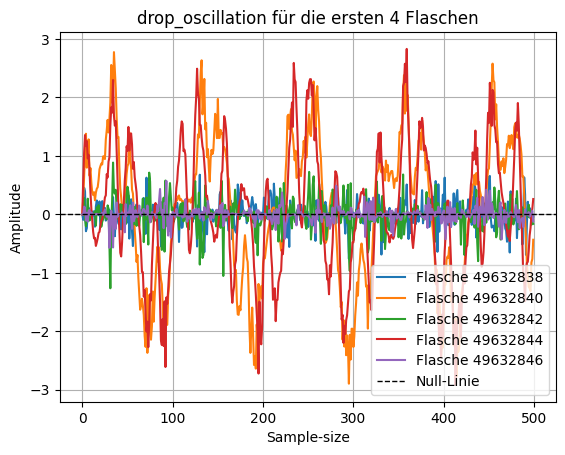

In [416]:
try:
    for table_idx, (index, row) in enumerate(drop_oscillation_df.iterrows()):
        if table_idx < 5: 
            plt.plot(range(len(row["drop_oscillation"])), row["drop_oscillation"], label=f"Flasche {row['bottle']}")

    plt.xlabel("Sample-size")
    plt.ylabel("Amplitude")
    plt.title("drop_oscillation für die ersten 4 Flaschen")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label="Null-Linie")
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Fehler beim Plotten der Drop Oscillations:", e)


## 📝 Feature Engineering: Drop Oscillation Merkmale

Für die Klassifikation der defekten Flaschen wurden aus den **Drop Oscillation Daten** folgende **statistische Merkmale berechnet**:

- **Mean (Mittelwert)**  
  ➔ Berechnet den durchschnittlichen Wert der Schwingungsamplitude und beschreibt das generelle Schwingungsniveau der Flasche.

- **STD (Standardabweichung)**  
  ➔ Gibt an, wie stark die einzelnen Amplitudenwerte um den Mittelwert streuen. Eine hohe Standardabweichung deutet auf unregelmäßige Schwingungen hin.

- **Minimum**  
  ➔ Der kleinste gemessene Wert innerhalb der Drop Oscillation Zeitreihe. Gibt Aufschluss über negative Ausreißer.

- **Maximum**  
  ➔ Der größte gemessene Wert innerhalb der Zeitreihe. Zeigt mögliche Spitzen in der Schwingung an.

- **RMS (Root Mean Square)**  
  ➔ Das quadratische Mittel der Amplituden. Diese Größe beschreibt die „energetische Stärke“ der Schwingung und ist sensitiv für hohe Einzelwerte.


In [417]:
df_merge_data = pd.merge(drop_oscillation_df, ground_truth_df, on="bottle", how="inner")
df_merge_data["Mean"] = df_merge_data["drop_oscillation"].apply(np.mean)
df_merge_data["STD"] = df_merge_data["drop_oscillation"].apply(np.std)
df_merge_data["Minimum"] = df_merge_data["drop_oscillation"].apply(np.min)
df_merge_data["Maximum"] = df_merge_data["drop_oscillation"].apply(np.max)
df_merge_data["RMS"] = df_merge_data["drop_oscillation"].apply(lambda x: np.sqrt(np.mean(np.square(x))))
df_merge_data.head()

,bottle,drop_oscillation,is_cracked,Mean,STD,Minimum,Maximum,RMS
0,49632838,"[0.0, -0.0937026961, 0.4550747878, 0.388663645...",0,0.000242,0.211670,-0.759673,0.677808,0.211671
1,49632840,"[0.0, 0.274569772, 0.666078562, 1.0258767955, ...",0,0.097120,1.226856,-2.896501,2.775172,1.230694
2,49632842,"[-0.0, 0.0336230298, 0.2789987429, -0.08418891...",0,-0.005812,0.249293,-1.264129,0.885806,0.249360
3,49632844,"[0.0, 0.5938713735, 1.05442488, 1.3555387527, ...",0,0.053010,1.111764,-2.917691,2.829866,1.113027
4,49632846,"[0.0, -0.0065474358, 0.1323816104, 0.111421154...",0,-0.002551,0.122411,-0.571734,0.572710,0.122438


## 🔧 **Train-Test-Split und Feature-Auswahl**

Für die Klassifikation wurden folgende Schritte durchgeführt:

1. **Feature-Auswahl**  
   Es wurden die berechneten statistischen Merkmale als Input-Features für das Modell ausgewählt:

   - RMS
   - Mean
   - STD
   - Minimum
   - Maximum

   Diese Features befinden sich in der Variable `X`.

2. **Label (Zielvariable)**  
   Die Zielvariable für die Klassifikation ist `is_cracked`, welche angibt, ob eine Flasche defekt ist oder nicht. Sie wurde der Variable `Y` zugewiesen.

3. **Aufteilung in Trainings- und Testdaten**  
   Mittels **`train_test_split`** wurde der Datensatz in **Trainings- und Testdaten** aufgeteilt:
   
   - **40%** der Daten wurden als **Testdaten** definiert (`test_size=0.4`).
   - Es wurde ein **random_state von 42** gesetzt, um reproduzierbare Ergebnisse zu gewährleisten.
   - Durch **`stratify=Y`** wird sichergestellt, dass der Anteil defekter und nicht-defekter Flaschen in beiden Datensätzen gleich verteilt ist.

4. **Initialisierung der Ergebnisspeicherung**  
   Eine leere Liste `results` wurde angelegt, um darin später die **Ergebnisse verschiedener Modelle und Metriken (z.B. F1-Scores)** strukturiert zu speichern.


In [418]:
feature_cols = ["RMS", "Mean", "STD", "Minimum", "Maximum"]
X = df_merge_data[feature_cols]
Y = df_merge_data["is_cracked"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42, stratify=Y
)

results = []

Dokumentation:

markdown
Kopieren
Bearbeiten
## **Modelltraining: Logistic Regression**

Für das Klassifikationsproblem wurde zunächst ein **Logistic Regression Modell** trainiert, um defekte Flaschen vorherzusagen.

---

### 🔧 **Schritte**

1. **Modellerstellung und Training**  
   - Es wurde ein **Logistic Regression Modell (`model_1`)** initialisiert.  
   - Das Modell wurde mit den **Trainingsdaten (`X_train`, `y_train`)** trainiert.

2. **Vorhersage und Evaluierung auf den Trainingsdaten**  
   - Mit dem trainierten Modell wurden Vorhersagen für die Trainingsdaten erstellt.
   - Die **Confusion Matrix** sowie der **Classification Report** wurden berechnet und angezeigt, um die Performance auf den Trainingsdaten zu evaluieren.
   - Die Confusion Matrix gibt Aufschluss über:
     - Richtig positive Vorhersagen
     - Richtig negative Vorhersagen
     - Falsch positive Vorhersagen
     - Falsch negative Vorhersagen

3. **Vorhersage und Evaluierung auf den Testdaten**  
   - Anschließend wurden Vorhersagen für die **Testdaten (`X_test`)** gemacht.
   - Auch hier wurde die **Confusion Matrix** sowie der **Classification Report** erstellt, um die Generalisierungsfähigkeit des Modells auf unbekannte Daten zu überprüfen.

---

### 📊 **Visualisierung**

Für beide Datensätze (Training und Test) wurde eine **Confusion Matrix visualisiert**, um die Verteilung der Vorhersagen übersichtlich darzustellen.

---


=== Logistic Regression Confusion Matrix (Training) ===
[[146   0]
 [ 13   0]]

=== Logistic Regression Classification Report (Training) ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       146
           1       0.00      0.00      0.00        13

    accuracy                           0.92       159
   macro avg       0.46      0.50      0.48       159
weighted avg       0.84      0.92      0.88       159



d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


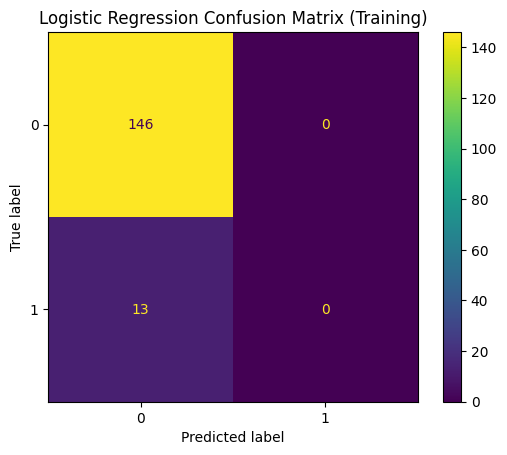


=== Logistic Regression Confusion Matrix (Test) ===
[[98  0]
 [ 9  0]]

=== Logistic Regression Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        98
           1       0.00      0.00      0.00         9

    accuracy                           0.92       107
   macro avg       0.46      0.50      0.48       107
weighted avg       0.84      0.92      0.88       107



d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


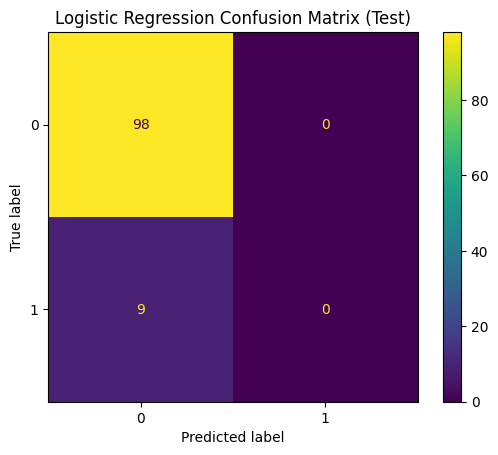

In [419]:
# Modelltraining
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

# Vorhersage auf Trainingsdaten
y_pred_train_logreg = model_1.predict(X_train)

print("\n=== Logistic Regression Confusion Matrix (Training) ===")
cm_train_logreg = confusion_matrix(y_train, y_pred_train_logreg)
print(cm_train_logreg)

print("\n=== Logistic Regression Classification Report (Training) ===")
print(classification_report(y_train, y_pred_train_logreg))

ConfusionMatrixDisplay(confusion_matrix=cm_train_logreg).plot()
plt.title("Logistic Regression Confusion Matrix (Training)")
plt.show()

# Vorhersage auf Testdaten
y_pred_test_logreg = model_1.predict(X_test)

print("\n=== Logistic Regression Confusion Matrix (Test) ===")
cm_test_logreg = confusion_matrix(y_test, y_pred_test_logreg)
print(cm_test_logreg)

print("\n=== Logistic Regression Classification Report (Test) ===")
print(classification_report(y_test, y_pred_test_logreg))

ConfusionMatrixDisplay(confusion_matrix=cm_test_logreg).plot()
plt.title("Logistic Regression Confusion Matrix (Test)")
plt.show()



## 📝 **Modellergebnisse: Speicherung der Performance-Metriken**

Nach dem Training und der Vorhersage mit der **Logistic Regression** wurden folgende Schritte durchgeführt:

---

### 🔧 **1. Datentyp-Anpassung**

Die Variablen `y_train`, `y_test`, `y_pred_train_logreg` und `y_pred_test_logreg` wurden explizit in **Integer-Typen umgewandelt**, um sicherzustellen, dass bei der Berechnung der Metriken keine Typinkompatibilitäten auftreten.

---

### 📊 **2. Berechnung der Performance-Metriken**

Für das Modell wurden folgende **Bewertungsmetriken** berechnet:

- **Train Accuracy**:  
  Der Anteil der korrekt klassifizierten Flaschen im **Trainingsdatensatz**.

- **Test Accuracy**:  
  Der Anteil der korrekt klassifizierten Flaschen im **Testdatensatz**.

- **Train F1-Score**:  
  Der harmonische Mittelwert von Precision und Recall auf dem Trainingsdatensatz. Gibt Aufschluss über die Balance zwischen falsch positiven und falsch negativen Vorhersagen.

- **Test F1-Score**:  
  Der F1-Score auf dem Testdatensatz als Maß für die Generalisierungsfähigkeit des Modells.

---

### 📥 **3. Speicherung der Ergebnisse**

Alle berechneten Metriken wurden in einer **Ergebnisliste `results`** gespeichert. Diese Struktur ermöglicht eine übersichtliche und strukturierte Darstellung der Modellperformance, insbesondere bei späteren Vergleichen mit anderen Modellen.

In [420]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_pred_train_logreg = y_pred_train_logreg.astype(int)
y_pred_test_logreg = y_pred_test_logreg.astype(int)

results.append({
    "Modell": "Logistic Regression",
    "Train Accuracy": accuracy_score(y_train, y_pred_train_logreg),
    "Test Accuracy": accuracy_score(y_test, y_pred_test_logreg),
    "Train F1": f1_score(y_train, y_pred_train_logreg),
    "Test F1": f1_score(y_test, y_pred_test_logreg),
})

## **Modelltraining: K-Nearest Neighbors (KNN)**

Für die Klassifikation wurde außerdem ein **K-Nearest Neighbors Modell (k=3)** trainiert, um defekte Flaschen vorherzusagen.

---

### 🔧 **Schritte**

1. **Modellerstellung und Training**  
   - Ein **KNN Modell mit 3 Nachbarn** wurde initialisiert und mit den Trainingsdaten trainiert.

2. **Vorhersage und Evaluierung auf Trainingsdaten**  
   - Vorhersagen auf den Trainingsdaten wurden erstellt.
   - Die **Confusion Matrix** und der **Classification Report** zeigen die Modellperformance auf bekannten Daten.

3. **Vorhersage und Evaluierung auf Testdaten**  
   - Vorhersagen auf den Testdaten wurden erstellt, um die Generalisierungsfähigkeit zu bewerten.
   - Auch hier wurden Confusion Matrix und Classification Report zur Analyse der Ergebnisse berechnet.

---

### 📊 **Visualisierung**

Für beide Datensätze (Training und Test) wurde eine **Confusion Matrix visualisiert**, um die Klassifikationsergebnisse übersichtlich darzustellen.



=== KNN Confusion Matrix (Training) ===
[[146   0]
 [  5   8]]

=== KNN Classification Report (Training) ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       146
           1       1.00      0.62      0.76        13

    accuracy                           0.97       159
   macro avg       0.98      0.81      0.87       159
weighted avg       0.97      0.97      0.97       159



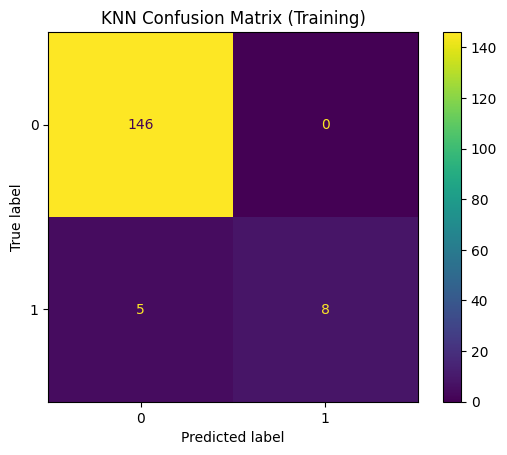


=== KNN Confusion Matrix (Test) ===
[[96  2]
 [ 8  1]]

=== KNN Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        98
           1       0.33      0.11      0.17         9

    accuracy                           0.91       107
   macro avg       0.63      0.55      0.56       107
weighted avg       0.87      0.91      0.88       107



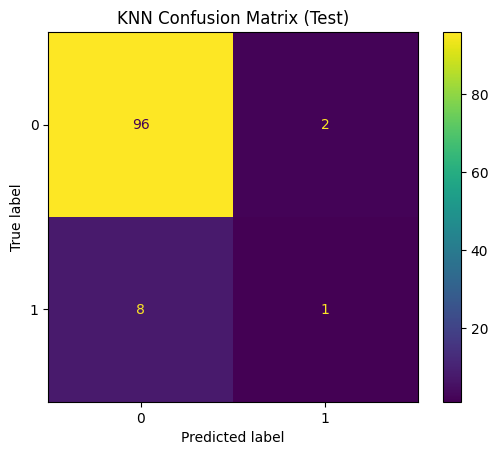

In [421]:
model_2 = KNeighborsClassifier(n_neighbors=3)
model_2.fit(X_train, y_train)

y_pred_train_knn = model_2.predict(X_train)

print("\n=== KNN Confusion Matrix (Training) ===")
cm_train_knn = confusion_matrix(y_train, y_pred_train_knn)
print(cm_train_knn)

print("\n=== KNN Classification Report (Training) ===")
print(classification_report(y_train, y_pred_train_knn))

ConfusionMatrixDisplay(confusion_matrix=cm_train_knn).plot()
plt.title("KNN Confusion Matrix (Training)")
plt.show()

y_pred_test_knn = model_2.predict(X_test)

print("\n=== KNN Confusion Matrix (Test) ===")
cm_test_knn = confusion_matrix(y_test, y_pred_test_knn)
print(cm_test_knn)

print("\n=== KNN Classification Report (Test) ===")
print(classification_report(y_test, y_pred_test_knn))

ConfusionMatrixDisplay(confusion_matrix=cm_test_knn).plot()
plt.title("KNN Confusion Matrix (Test)")
plt.show()



In [422]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_pred_train_knn = y_pred_train_knn.astype(int)
y_pred_test_knn = y_pred_test_knn.astype(int)

results.append({
    "Modell": "KNN",
    "Train Accuracy": accuracy_score(y_train, y_pred_train_knn),
    "Test Accuracy": accuracy_score(y_test, y_pred_test_knn),
    "Train F1": f1_score(y_train, y_pred_train_knn),
    "Test F1": f1_score(y_test, y_pred_test_knn),
})

Zusätzlich wurde ein **Support Vector Classifier (SVC)** trainiert.

---

### 🔧 **Schritte**

1. **Modellerstellung und Training**  
   - Ein **SVC Modell** wurde erstellt und mit den Trainingsdaten trainiert.

2. **Vorhersage und Evaluierung auf Trainings- und Testdaten**  
   - Für beide Datensätze wurden Vorhersagen erstellt und mittels **Confusion Matrix** sowie **Classification Report** bewertet.

---

### 📊 **Visualisierung**

Die **Confusion Matrix** für Training und Test zeigt die Verteilung der Vorhersageergebnisse und erlaubt Rückschlüsse auf Overfitting oder Underfitting des Modells.


=== SVC Confusion Matrix (Training) ===
[[146   0]
 [ 13   0]]

=== SVC Classification Report (Training) ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       146
           1       0.00      0.00      0.00        13

    accuracy                           0.92       159
   macro avg       0.46      0.50      0.48       159
weighted avg       0.84      0.92      0.88       159



d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


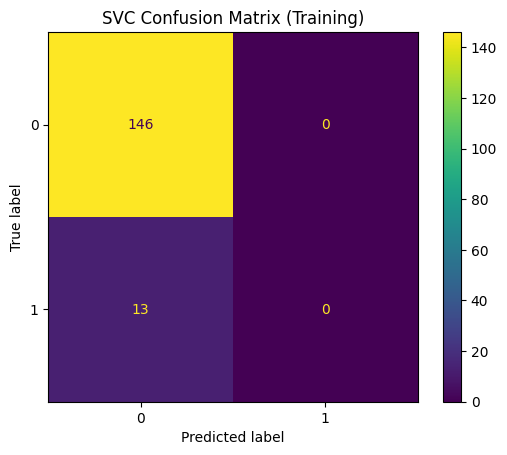


=== SVC Confusion Matrix (Test) ===
[[98  0]
 [ 9  0]]

=== SVC Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        98
           1       0.00      0.00      0.00         9

    accuracy                           0.92       107
   macro avg       0.46      0.50      0.48       107
weighted avg       0.84      0.92      0.88       107



d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\AUT_juhu\AUT_Database\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


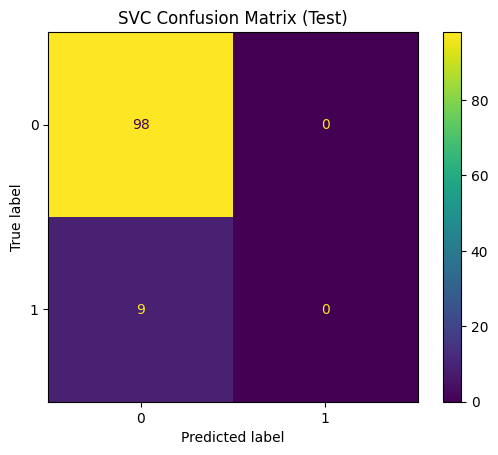

In [423]:
# Modelltraining
model_3 = SVC()
model_3.fit(X_train, y_train)
# Vorhersage auf Trainingsdaten
y_pred_train_svc = model_3.predict(X_train)

print("\n=== SVC Confusion Matrix (Training) ===")
cm_train_svc = confusion_matrix(y_train, y_pred_train_svc)
print(cm_train_svc)

print("\n=== SVC Classification Report (Training) ===")
print(classification_report(y_train, y_pred_train_svc))

ConfusionMatrixDisplay(confusion_matrix=cm_train_svc).plot()
plt.title("SVC Confusion Matrix (Training)")
plt.show()

# Vorhersage auf Testdaten
y_pred_test_svc = model_3.predict(X_test)

print("\n=== SVC Confusion Matrix (Test) ===")
cm_test_svc = confusion_matrix(y_test, y_pred_test_svc)
print(cm_test_svc)

print("\n=== SVC Classification Report (Test) ===")
print(classification_report(y_test, y_pred_test_svc))

ConfusionMatrixDisplay(confusion_matrix=cm_test_svc).plot()
plt.title("SVC Confusion Matrix (Test)")
plt.show()



In [424]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_pred_train_svc = y_pred_train_svc.astype(int)
y_pred_test_svc = y_pred_test_svc.astype(int)

results.append({
    "Modell": "SVC",
    "Train Accuracy": accuracy_score(y_train, y_pred_train_svc),
    "Test Accuracy": accuracy_score(y_test, y_pred_test_svc),
    "Train F1": f1_score(y_train, y_pred_train_svc),
    "Test F1": f1_score(y_test, y_pred_test_svc),
})

# 🤖 **Modelltraining: Random Forest Classifier**

Schließlich wurde ein **Random Forest Classifier** trainiert, um die Vorhersagequalität durch ein Ensembleverfahren zu evaluieren.

---

### 🔧 **Schritte**

1. **Modellerstellung und Training**  
   - Ein **Random Forest Modell** wurde erstellt und auf den Trainingsdaten trainiert.

2. **Vorhersage und Evaluierung auf Trainings- und Testdaten**  
   - Vorhersagen wurden auf beiden Datensätzen berechnet und mit **Confusion Matrix** und **Classification Report** ausgewertet.

---

### 📊 **Visualisierung**

Die Visualisierung der **Confusion Matrices** erlaubt eine schnelle Einschätzung der Modellgüte und Vergleichbarkeit zu den anderen Klassifikationsverfahren.



=== Random Forest Confusion Matrix (Training) ===
[[146   0]
 [  0  13]]

=== Random Forest Classification Report (Training) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        13

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



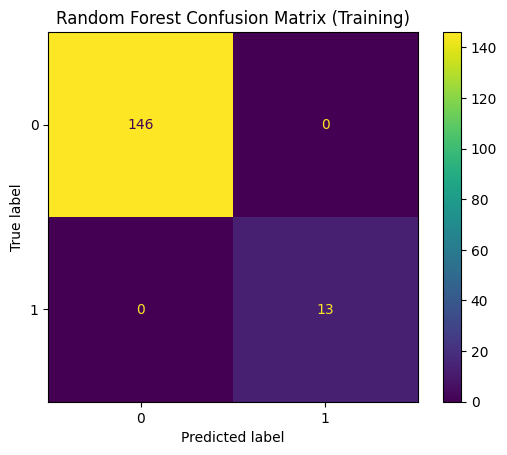


=== Random Forest Confusion Matrix (Test) ===
[[96  2]
 [ 6  3]]

=== Random Forest Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        98
           1       0.60      0.33      0.43         9

    accuracy                           0.93       107
   macro avg       0.77      0.66      0.69       107
weighted avg       0.91      0.93      0.92       107



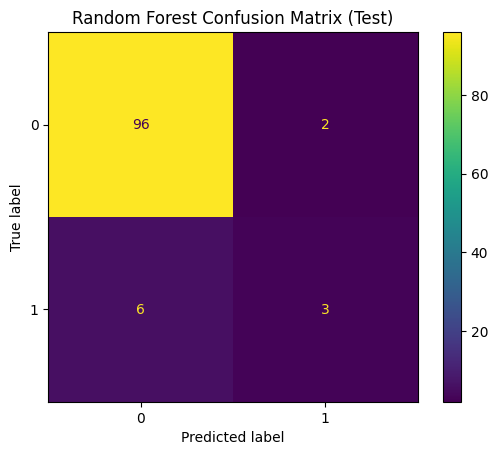

In [425]:
model_4 = RandomForestClassifier(random_state=42)
model_4.fit(X_train, y_train)

#Vorhersage auf Trainingsdaten
y_pred_train_rf = model_4.predict(X_train)

print("\n=== Random Forest Confusion Matrix (Training) ===")
cm_train_rf = confusion_matrix(y_train, y_pred_train_rf)
print(cm_train_rf)

print("\n=== Random Forest Classification Report (Training) ===")
print(classification_report(y_train, y_pred_train_rf))

ConfusionMatrixDisplay(confusion_matrix=cm_train_rf).plot()
plt.title("Random Forest Confusion Matrix (Training)")
plt.show()

# Vorhersage auf Testdaten
y_pred_test_rf = model_4.predict(X_test)

print("\n=== Random Forest Confusion Matrix (Test) ===")
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)
print(cm_test_rf)

print("\n=== Random Forest Classification Report (Test) ===")
print(classification_report(y_test, y_pred_test_rf))

ConfusionMatrixDisplay(confusion_matrix=cm_test_rf).plot()
plt.title("Random Forest Confusion Matrix (Test)")
plt.show()



In [426]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_pred_train_rf = y_pred_train_rf.astype(int)
y_pred_test_rf = y_pred_test_rf.astype(int)

results.append({
    "Modell": "Random Forest",
    "Train Accuracy": accuracy_score(y_train, y_pred_train_rf),
    "Test Accuracy": accuracy_score(y_test, y_pred_test_rf),
    "Train F1": f1_score(y_train, y_pred_train_rf),
    "Test F1": f1_score(y_test, y_pred_test_rf),
})

 **Ergebnisübersicht: Zusammenfassung der Modellperformance**

Nach dem Training und der Evaluierung aller Klassifikationsmodelle wurden die berechneten Metriken in einem **DataFrame `df_result`** zusammengefasst.

---

### 🔧 **Was passiert hier?**

- Die Liste `results`, die während des Trainings mit Dictionaries gefüllt wurde, enthält für jedes Modell:

  - **Modellname**
  - **Train Accuracy**
  - **Test Accuracy**
  - **Train F1-Score**
  - **Test F1-Score**

- Mit **`pd.DataFrame(results)`** wird diese Liste in einen strukturierten DataFrame konvertiert, der anschließend mit **`print(df_result)`** ausgegeben wird.


In [427]:
df_result = pd.DataFrame(results)
print(df_result)

                Modell  Train Accuracy  Test Accuracy  Train F1   Test F1
0  Logistic Regression        0.918239       0.915888  0.000000  0.000000
1                  KNN        0.968553       0.906542  0.761905  0.166667
2                  SVC        0.918239       0.915888  0.000000  0.000000
3        Random Forest        1.000000       0.925234  1.000000  0.428571
